# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [3]:
fashion_mnist_train_data = pd.read_csv('fashion-mnist_train.csv')
fashion_mnist_test_data = pd.read_csv('fashion-mnist_test.csv')

In [4]:
fashion_mnist_train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_mnist_train_data.shape

(60000, 785)

In [6]:
fashion_mnist_test_data.shape

(10000, 785)

# Visualising the Data

In [7]:
#If we take a row from a dataframe, it will be a series object which doesn't have reshape function.
#So we are converting the dataframes into an array 

train_array = np.array(fashion_mnist_train_data,dtype='float32') 

In [8]:
test_array = np.array(fashion_mnist_test_data,dtype='float32')

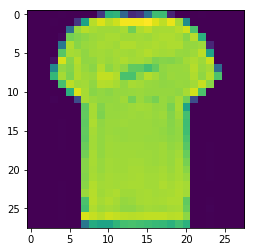

In [9]:
plt.imshow(train_array[10,1:].reshape(28,28))

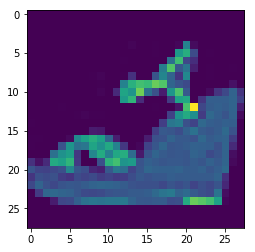

In [10]:
plt.imshow(train_array[694,1:].reshape(28,28)) #We can reshape a matrix

# Normalising the Data 

In [31]:
y_train_data = train_array[:,0]
X_train_data = train_array[:,1:]/255

In [35]:
y_test_data = test_array[:,0]
X_test_data = test_array[:,1:]/255

# Training the Model

In [15]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_data, y_train_data, test_size=0.33, random_state=42)

In [77]:
X_train.shape

(40200, 28, 28, 1)

In [41]:
#Since we will feeding this as input, we need to shape it as expected by the built in functions.

X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test_data.reshape(X_test_data.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [17]:
import keras

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [63]:
cnn_model = Sequential()

In [64]:
cnn_model.add(Conv2D(64,3,3,input_shape=(28,28,1),activation='relu'))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [65]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [66]:
cnn_model.add(Flatten())

In [67]:
cnn_model.add(Dense(units=32,activation='relu'))

In [68]:
cnn_model.add(Dense(units=10,activation='sigmoid'))

In [69]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [70]:
cnn_model.fit(X_train,y_train,batch_size=100,epochs=50,verbose=3,validation_data=(X_validate,y_validate))

Train on 40200 samples, validate on 19800 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [71]:
evaluations = cnn_model.evaluate(X_test,y_test_data)

10000/10000 [==============================] - 2s 181us/step


In [72]:
evaluations

[0.4588481536734849, 0.9107]

In [73]:
predicted_classes = cnn_model.predict_classes(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
num_classes = 10
target_names = ["class {}".format(i) for i in range(num_classes)]

In [76]:
print(classification_report(y_test_data,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.87      0.85      1000
     class 1       0.98      0.99      0.99      1000
     class 2       0.89      0.83      0.86      1000
     class 3       0.89      0.93      0.91      1000
     class 4       0.87      0.88      0.87      1000
     class 5       0.98      0.97      0.97      1000
     class 6       0.77      0.73      0.75      1000
     class 7       0.95      0.96      0.96      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.97      0.96      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#We are getting amazing accuracy, however to improve further we can use different kernel size or Dropout method.